In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import minimize
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Linear Model : Feature와 Labels

In [2]:
def forward_model(w, x):
    assert w.shape[0] == x.shape[0]
    return w.dot(x)

In [3]:
def loss_mse(w, feature_set, label_set):
    val = 0.0
    for feature, label in zip(feature_set, label_set):
        val = val + np.square(forward_model(w, feature) - label)
    val /= len(feature_set)
    return val

## 1. Linear Regression Model
$$
f(x) = w_0 + w_1x
$$

In [4]:
np.random.seed(327)
x = np.linspace(-1,1,50)
y = x + 1.0 + np.random.rand(len(x))

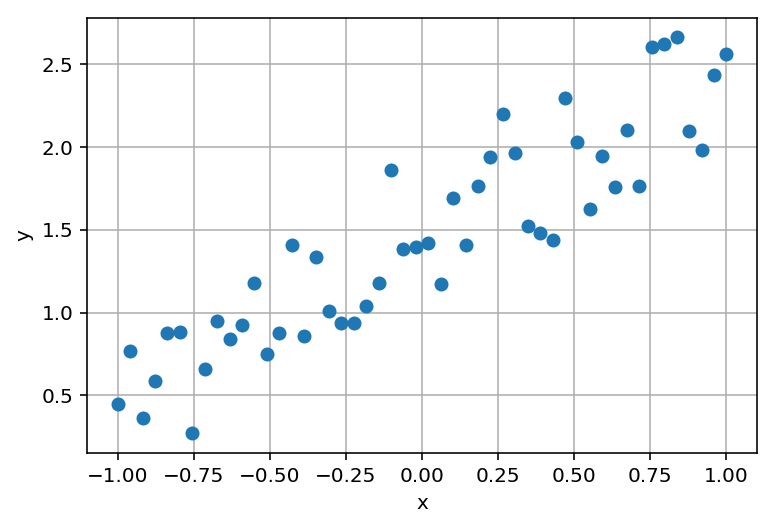

In [5]:
plt.plot(x, y, 'o')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
features1 = np.array([[1., xval] for xval in x])
labels1 = y

In [7]:
w0 = np.array([0.7, 1])
loss1 = lambda w: loss_mse(w, features1, labels1)
res = minimize(loss1, w0)
print(res)
w1 = res.x

      fun: 0.06890655739000363
 hess_inv: array([[4.99659606e-01, 1.35195675e-05],
       [1.35195675e-05, 1.44117561e+00]])
      jac: array([-7.45058060e-08,  1.86264515e-09])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([1.44442267, 0.96738334])


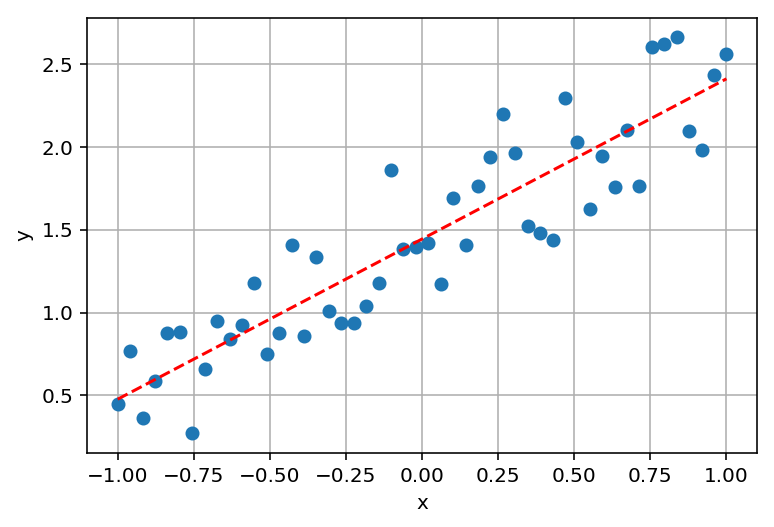

In [8]:
prediction1 = np.dot(features1, w1)
plt.plot(x, y, 'o')
plt.plot(x, prediction1, '--r')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 2. Quadratic Regression Model
$$
f(x) = w_0 + w_1x + w_2x^2
$$

In [9]:
np.random.seed(327)
x = np.linspace(-1,1,50)
y = x**2 + 0.5 * x + 1.0 + 0.5 * np.random.rand(len(x))

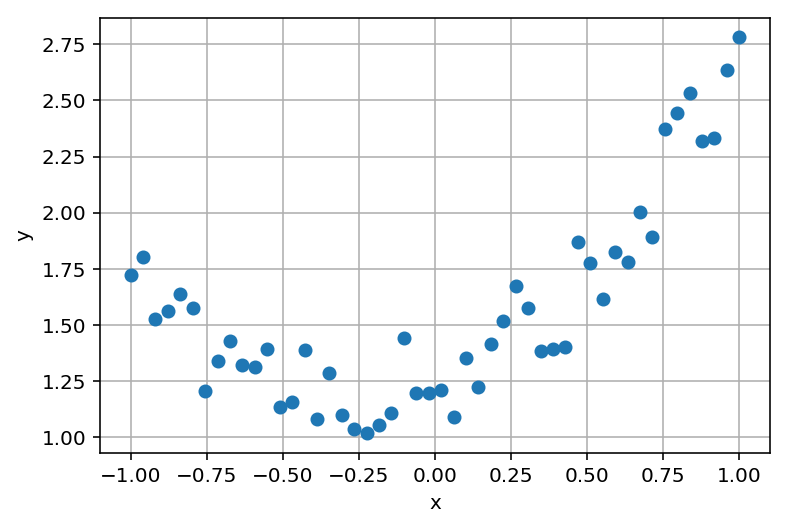

In [10]:
plt.plot(x, y, 'o')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
# TODO1
features2 = np.array([[1., xval, xval**2] for xval in x])
labels2 = y

In [12]:
w0 = np.array([0.7, 1, 0.5])
loss2 = lambda w: loss_mse(w, features2, labels2)
res = minimize(loss2, w0)
print(res)
w2 = res.x

      fun: 0.017145705544195634
 hess_inv: array([[ 1.04804188,  0.01618925, -1.67419193],
       [ 0.01618925,  1.42815891, -0.06441827],
       [-1.67419193, -0.06441827,  4.83766511]])
      jac: array([-4.31435183e-07,  4.08291817e-06,  6.15534373e-06])
  message: 'Optimization terminated successfully.'
     nfev: 50
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([1.21213552, 0.48369755, 1.02904149])


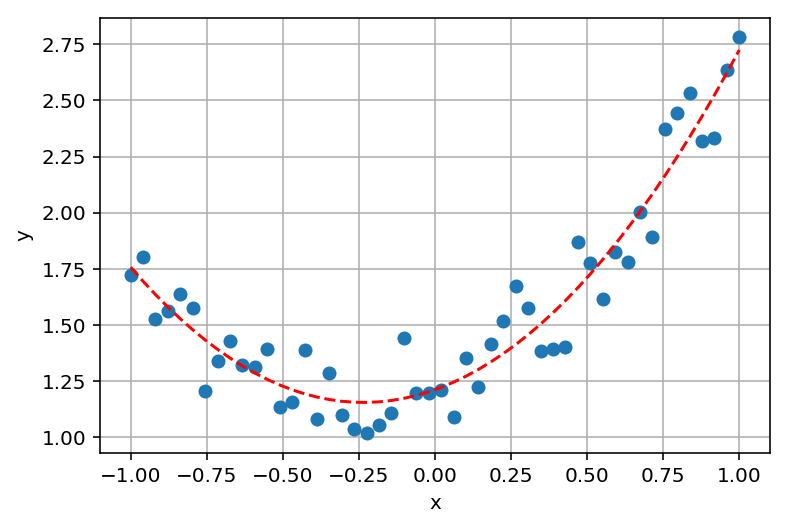

In [13]:
prediction2 = np.dot(features2, w2)
plt.plot(x, y, 'o')
plt.plot(x, prediction2, '--r')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 3. Cubic Regression Model
$$
f(x) = w_0 + w_1x + w_2x^2 + w_3x^3
$$

In [14]:
np.random.seed(327)
x = np.linspace(-1,1,50)
y = 2*x**3 - .4 * x**2 + .5 * x + 1.0 + 0.5 * np.random.rand(len(x))

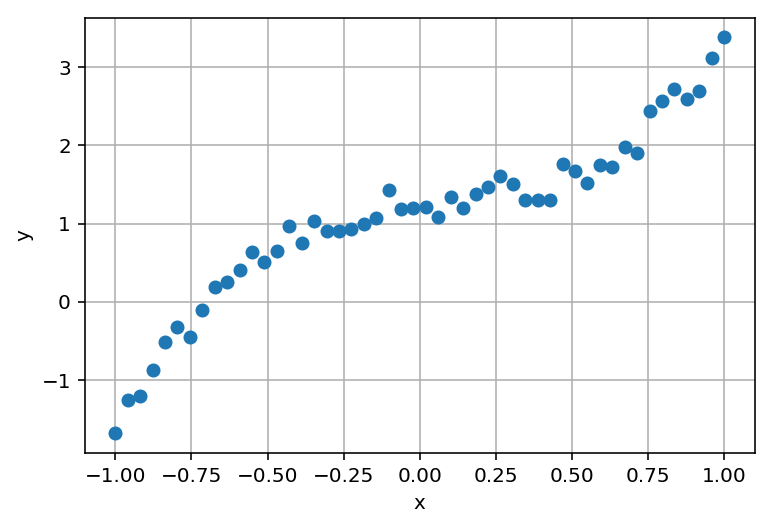

In [15]:
plt.plot(x, y, 'o')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
# TODO 2
features3 = np.array([[1, xval, xval**2, xval**3] for xval in x])
labels3 = y

In [17]:
w0 = np.array([0.0, 0.7, 1, 0.5])
loss3 = lambda w: loss_mse(w, features3, labels3)
res = minimize(loss3, w0)
print(res)
w3 = res.x

      fun: 0.01714537859396392
 hess_inv: array([[ 1.04562632e+00,  3.31552628e-02, -1.61032697e+00,
        -7.98374231e-03],
       [ 3.31552628e-02,  9.00820891e+00, -1.25307296e-01,
        -1.20785575e+01],
       [-1.61032697e+00, -1.25307296e-01,  4.61623575e+00,
         1.78429743e-01],
       [-7.98374231e-03, -1.20785575e+01,  1.78429743e-01,
         1.93187871e+01]])
      jac: array([-3.41143459e-06,  9.71136615e-07, -9.98144969e-07,  8.13743100e-07])
  message: 'Optimization terminated successfully.'
     nfev: 90
      nit: 14
     njev: 15
   status: 0
  success: True
        x: array([ 1.21214507,  0.48146288, -0.37099033,  2.00357311])


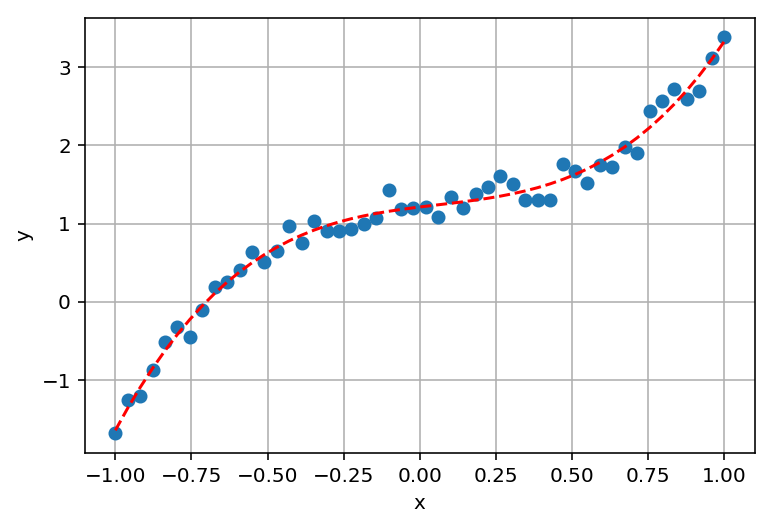

In [18]:
prediction3 = np.dot(features3, w3)
plt.plot(x, y, 'o')
plt.plot(x, prediction3, '--r')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 4. Exponential Regression Model
\begin{align}
f(x) &= e^{w_0x}\\
g(x) &= \ln f(x) = w_0x
\end{align}

In [19]:
np.random.seed(327)
x = np.linspace(-1,1,50)
y = np.exp(2 * x) + 0.2 * (2* np.random.rand(len(x))-1)

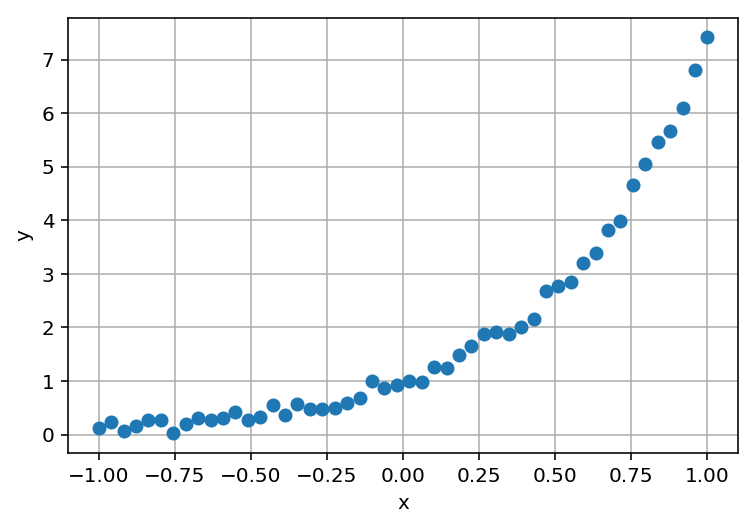

In [20]:
plt.plot(x, y, 'o')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [21]:
features4 = np.array([[xval] for xval in x])
labels4 = np.log(y)

In [22]:
w0 = np.array([0.2])
loss4 = lambda w: loss_mse(w, features4, labels4)
res = minimize(loss4, w0)
print(res)
w4 = res.x

      fun: 0.10720311516093256
 hess_inv: array([[1.44117645]])
      jac: array([-1.3038516e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.09019023])


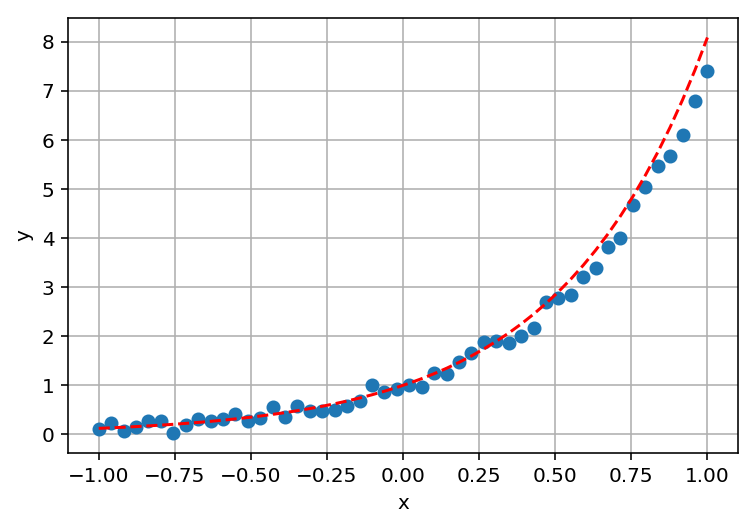

In [23]:
prediction4 = np.exp(np.dot(features4, w4))
plt.plot(x, y, 'o')
plt.plot(x, prediction4, '--r')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 5. Sine/cosine Regression
$$
f(x) = w_0\cos(\pi x) + w_1\sin(\pi  x)
$$

In [24]:
np.random.seed(327)
x = np.linspace(-1,1,50)
y = 1.0 * np.cos(np.pi * x) + 1.0 * np.sin(np.pi*x) + 2 * np.random.rand(len(x)) - 1

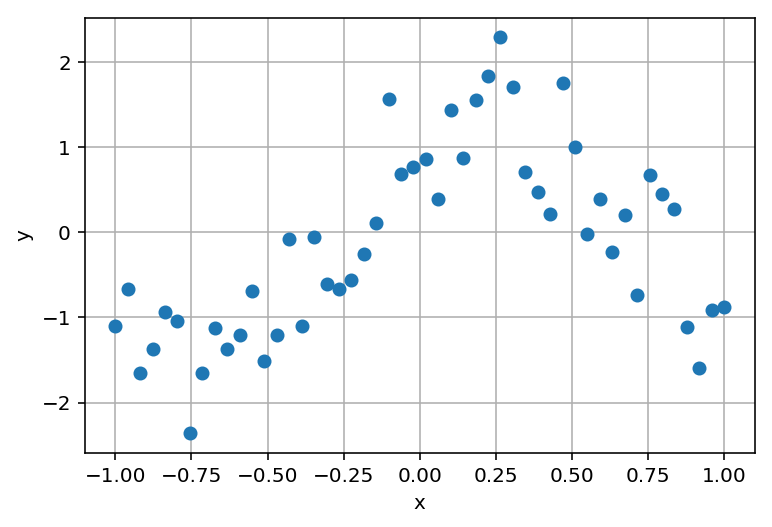

In [25]:
plt.plot(x, y, 'o')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [26]:
# TODO 3
features5 = np.array([[np.cos(np.pi * xval), np.sin(np.pi * xval)] for xval in x])
labels5 = y

In [27]:
w0 = np.array([0.2, 0.7])
loss5 = lambda w: loss_mse(w, features5, labels5)
res = minimize(loss5, w0)
print(res)
w5 = res.x

      fun: 0.28803022392765776
 hess_inv: array([[ 0.97939004, -0.00315177],
       [-0.00315177,  1.0104957 ]])
      jac: array([-4.28408384e-07, -1.28149986e-06])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([0.96469411, 0.95979516])


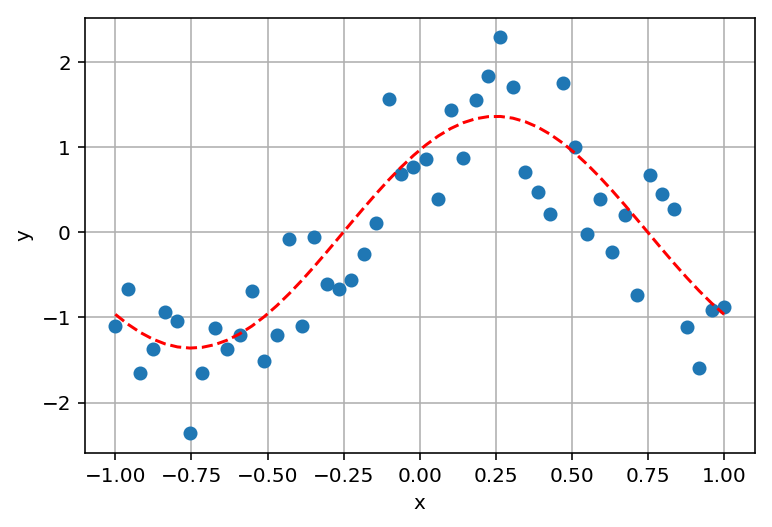

In [28]:
prediction5 = np.dot(features5, w5)
plt.plot(x, y, 'o')
plt.plot(x, prediction5, '--r')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()